# Airbnb Exploratory Analysis

Open Data obtained from Kaggle  
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/downloads/new-york-city-airbnb-open-data.zip/3

In [106]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [107]:
import os

In [108]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Constants

In [109]:
BASEPATH = os.path.abspath('')
DATASET = 'AB_NYC_2019.csv'
PATH = os.path.join(BASEPATH,DATASET)
print(PATH)

D:\Dropbox (Personal)\Corsi\RETI\Corso Data Scientist\DataScienceCourse\08_DataScienceProject\NewYorkAirbnb\AB_NYC_2019.csv


#### Import the data

In [110]:
#Import the data
df = pd.read_csv(PATH, low_memory=False, 
                     parse_dates=["last_review"])
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaT   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

#### Count and explore

In [111]:
#checking amount of rows in given dataset to understand the size we are working with

print(f'Dataframe Length: {len(df)}')
print(f'Number of Columns: {len(df.columns)}')


Dataframe Length: 48895
Number of Columns: 16


In [112]:
#Data Types
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [113]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [114]:
display_all(df.tail().T)

48890  \
id                                                                     36484665   
name                            Charming one bedroom - newly renovated rowhouse   
host_id                                                                 8232441   
host_name                                                               Sabrina   
neighbourhood_group                                                    Brooklyn   
neighbourhood                                                Bedford-Stuyvesant   
latitude                                                                40.6785   
longitude                                                                -73.95   
room_type                                                          Private room   
price                                                                        70   
minimum_nights                                                                2   
number_of_reviews                                                             0   
last_review                                                                 NaT   
reviews_per_month                                                           NaN   
calculated_host_listings_count                                                2   
availability_365                                                              9   

                                                                        48891  \
id                                                                   36485057   
name                            Affordable room in Bushwick/East Williamsburg   
host_id                                                               6570630   
host_name                                                             Marisol   
neighbourhood_group                                                  Brooklyn   
neighbourhood                                                        Bushwick   
latitude                                                              40.7018   
longitude                                                            -73.9332   
room_type                                                        Private room   
price                                                                      40   
minimum_nights                                                              4   
number_of_reviews                                                           0   
last_review                                                               NaT   
reviews_per_month                                                         NaN   
calculated_host_listings_count                                              2   
availability_365                                                           36   

                                                                  48892  \
id                                                             36485431   
name                            Sunny Studio at Historical Neighborhood   
host_id                                                        23492952   
host_name                                                 Ilgar & Aysel   
neighbourhood_group                                           Manhattan   
neighbourhood                                                    Harlem   
latitude                                                        40.8147   
longitude                                                      -73.9487   
room_type                                               Entire home/apt   
price                                                               115   
minimum_nights                                                       10   
number_of_reviews                                                     0   
last_review                                                         NaT   
reviews_per_month                                                   NaN   
calculated_host_listings_count                                        1   
availability_365                                                     27   

        

In [115]:
display_all(df.describe(include='all').T)

count unique                  top   freq  \
id                              48895    NaN                  NaN    NaN   
name                            48879  47905       Hillside Hotel     18   
host_id                         48895    NaN                  NaN    NaN   
host_name                       48874  11452              Michael    417   
neighbourhood_group             48895      5            Manhattan  21661   
neighbourhood                   48895    221         Williamsburg   3920   
latitude                        48895    NaN                  NaN    NaN   
longitude                       48895    NaN                  NaN    NaN   
room_type                       48895      3      Entire home/apt  25409   
price                           48895    NaN                  NaN    NaN   
minimum_nights                  48895    NaN                  NaN    NaN   
number_of_reviews               48895    NaN                  NaN    NaN   
last_review                     38843   1764  2019-06-23 00:00:00   1413   
reviews_per_month               38843    NaN                  NaN    NaN   
calculated_host_listings_count  48895    NaN                  NaN    NaN   
availability_365                48895    NaN                  NaN    NaN   

                                    first       last         mean  \
id                                    NaT        NaT  1.90171e+07   
name                                  NaT        NaT          NaN   
host_id                               NaT        NaT    6.762e+07   
host_name                             NaT        NaT          NaN   
neighbourhood_group                   NaT        NaT          NaN   
neighbourhood                         NaT        NaT          NaN   
latitude                              NaT        NaT      40.7289   
longitude                             NaT        NaT     -73.9522   
room_type                             NaT        NaT          NaN   
price                                 NaT        NaT      152.721   
minimum_nights                        NaT        NaT      7.02996   
number_of_reviews                     NaT        NaT      23.2745   
last_review                    2011-03-28 2019-07-08          NaN   
reviews_per_month                     NaT        NaT      1.37322   
calculated_host_listings_count        NaT        NaT      7.14398   
availability_365                      NaT        NaT      112.781   

                                        std      min          25%  \
id                              1.09831e+07     2539  9.47194e+06   
name                                    NaN      NaN          NaN   
host_id                          7.8611e+07     2438  7.82203e+06   
host_name                               NaN      NaN          NaN   
neighbourhood_group                     NaN      NaN          NaN   
neighbourhood                           NaN      NaN          NaN   
latitude                          0.0545301  40.4998      40.6901   
longitude                         0.0461567 -74.2444     -73.9831   
room_type                               NaN      NaN          NaN   
price                               240.154        0           69   
minimum_nights                      20.5105        1            1   
number_of_reviews                   44.5506        0            1   
last_review                             NaN      NaN          NaN   
reviews_per_month                   1.68044     0.01         0.19   
calculated_host_listings_count      32.9525        1            1   
availability_365                    131.622        0            0   

                                        50%          75%          max  
id                              1.96773e+07  2.91522e+07  3.64872e+07  
name                                    NaN          NaN          NaN  
host_id                         3.07938e+07  1.07434e+08  2.74321e+08  
host_name                               NaN          NaN          NaN  
neighbourhood_group            

Check null Data

In [116]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Function to delete missing numbers data

In [117]:
def delete_data(dataframe, columns):
    result = pd.DataFrame()
    #dropping columns that are not significant or could be unethical to use
    result = dataframe.drop(columns, axis=1, inplace=True)
    #examing the changes
    print(dataframe.head(5))
    
    return result

In [118]:
# columns = ['id','host_name','last_review']
# airbnb = delete_data(df, columns)

In [119]:
#Replace null numbers in dataframe columns
def replace_null_numbers(dataframe, columns):
    result = pd.DataFrame()
    if isinstance(columns, list):
        for i,col in enumerate(columns):
            print(f'Column: {i}, name: {col}')
            dataframe.fillna({col:0}, inplace=True)
            #replacing all NaN values in 'reviews_per_month' with 0

            #check column is null
            dataframe[col].isnull().sum()

            result = dataframe
        return result
    else:
        print("Please usa a list of columns to delete")
        return None


In [120]:
#replace null numbers
df = replace_null_numbers(df, ['reviews_per_month'])

Column: 0, name: reviews_per_month


#### Check Unique Data

In [121]:
def check_unique(dataframe,columns):
    
    if isinstance(columns,list):
        
        for i,col in enumerate(columns):
            
            print(f'\nColumn: {col}')
            print(dataframe[col].unique())
            
    else:
        print("Input columns must be a list")
        return None

In [122]:
check_unique(df,['neighbourhood_group','neighbourhood','room_type'])


Column: neighbourhood_group
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']

Column: neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridg

### Top Host
Quali host (ID) hanno più case su Airbnb e ottengono vantaggi da essi

In [123]:
top_host=df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

#### Neighborough wordcloud

In [124]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [125]:
text = " ".join(review for review in df['neighbourhood'])
print (f"There are {len(text)} words in the combination of all review.")

There are 630490 words in the combination of all review.


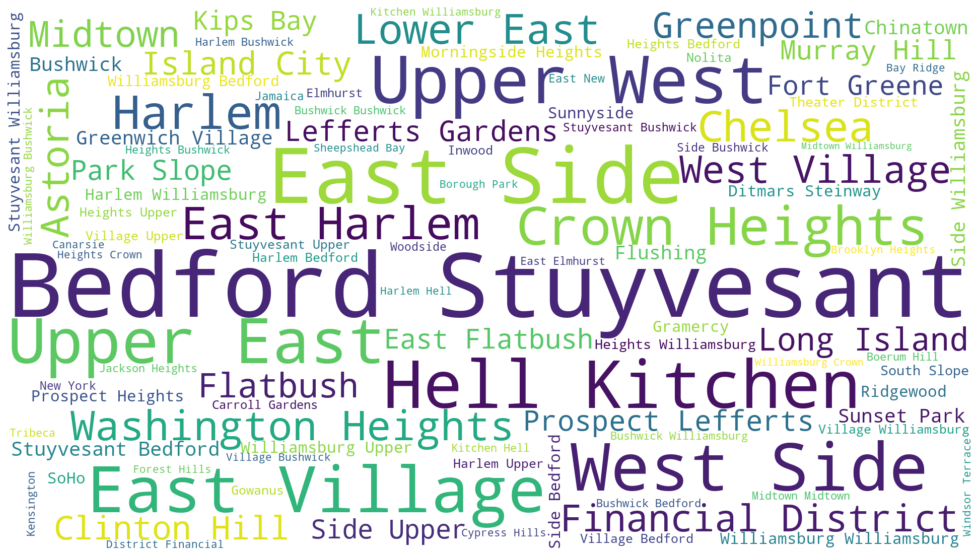

In [126]:
wordcloud = WordCloud(width=1920, height=1080,max_font_size=200, max_words=100, background_color="white").generate(text)

plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")

#save the image
plt.savefig(os.path.join(BASEPATH,'wordcloud.png'), format="png",bbox_inches='tight')

plt.show()



### Top Zone
Quali zone di Manhattan hanno tante case

In [127]:
top_zone=df.neighbourhood_group.value_counts().head(10)
top_zone

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

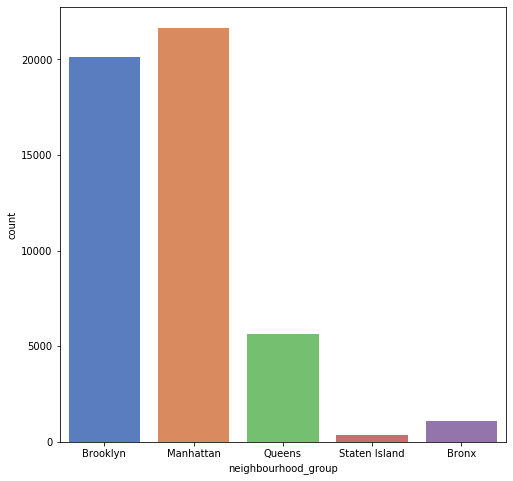

In [128]:
plt.figure(figsize=(8,8))
ax = sns.countplot(df["neighbourhood_group"], palette="muted" ) 

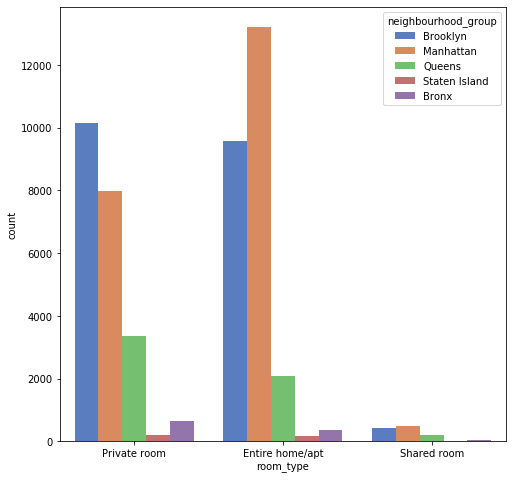

In [129]:
plt.figure(figsize=(8,8))
ax = sns.countplot(df['room_type'],hue=df['neighbourhood_group'], palette='muted')

### Number of reviews for Room Type

In [130]:
df.groupby('room_type')['number_of_reviews'].mean()

df.groupby(
    ['room_type','neighbourhood_group']
).agg(
    {
        'number_of_reviews': [sum, 'mean'],
        'price': "mean",
        'calculated_host_listings_count' : [sum,'count','mean']
    }
)

number_of_reviews                  price  \
                                                  sum       mean        mean   
room_type       neighbourhood_group                                            
Entire home/apt Bronx                           11627  30.678100  127.506596   
                Brooklyn                       267128  27.945183  178.327545   
                Manhattan                      235147  17.815516  249.239109   
                Queens                          60644  28.933206  147.050573   
                Staten Island                    5857  33.278409  173.846591   
Private room    Bronx                           16312  25.018405   66.788344   
                Brooklyn                       213653  21.086952   76.500099   
                Manhattan                      209150  26.202706  116.776622   
                Queens                          93561  27.746441   71.762456   
                Staten Island                    5670  30.159574   62.292553   
Shared room     Bronx                             432   7.200000   59.800000   
                Brooklyn                         5793  14.026634   50.527845   
                Manhattan                       10272  21.400000   88.977083   
                Queens                           2745  13.863636   69.020202   
                Staten Island                      14   1.555556   57.444444   

                                    calculated_host_listings_count         \
                                                               sum  count   
room_type       neighbourhood_group                                         
Entire home/apt Bronx                                          707    379   
                Brooklyn                                     17568   9559   
                Manhattan                                   249761  13199   
                Queens                                        3517   2096   
                Staten Island                                  281    176   
Private room    Bronx                                         1525    652   
                Brooklyn                                     25808  10132   
                Manhattan                                    25447   7982   
                Queens                                       18748   3372   
                Staten Island                                  534    188   
Shared room     Bronx                                          205     60   
                Brooklyn                                      2549    413   
                Manhattan                                     1865    480   
                Queens                                         740    198   
                Staten Island                                   50      9   

                                                
                                          mean  
room_type       neighbourhood_group             
Entire home/apt Bronx                 1.865435  
                Brooklyn              1.837849  
                Manhattan            18.922721  
                Queens                1.677958  
                Staten Island         1.596591  
Private room    Bronx                 2.338957  
                Brooklyn              2.547177  
                Manhattan             3.188048  
                Queens                5.559905  
                Staten Island         2.840426  
Shared room     Bronx                 3.416667  
                Brooklyn              6.171913  
                Manhattan             3.885417  
                Queens                3.737374  
                Staten Island         5.555556

### Price
Media del prezzo in generale

In [131]:
price_avrg=df.price.mean()
print('Average price per night: {}'.format(price_avrg))

##TODO: Price filtered per every type

Average price per night: 152.7206871868289


### Plotly interactive Map

In [132]:
#need to clear extreme price data
sub_df=pd.DataFrame()
sub_df=df[df.price < 600]

In [133]:
import plotly.express as px

fig = px.scatter_mapbox(sub_df, lat="latitude", lon="longitude", color="price", size="number_of_reviews",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


# Machine Learning

Iniziamo la parte di Machine Learning, quello che vogliamo predirre è il prezzo di una casa basandoci sulle sue caratteristiche.  
È certamente importante capire e analizzare più nel dettaglio le feature e capire la distribuzione del prezzo.

In [134]:
df_ml = df.copy()

Valutiamo ancora i missing data

In [135]:
def calc_missing(df_ml):
    total = df_ml.isnull().sum().sort_values(ascending=False)
    percent = (df_ml.isnull().sum())/df_ml.isnull().count().sort_values(ascending=False)

    missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False
                                ).sort_values('Total', ascending=False)

    return missing_data

In [136]:
result = calc_missing(df_ml)
result

Total   Percent
last_review                     10052  0.205583
host_name                          21  0.000429
name                               16  0.000327
availability_365                    0  0.000000
calculated_host_listings_count      0  0.000000
reviews_per_month                   0  0.000000
number_of_reviews                   0  0.000000
minimum_nights                      0  0.000000
price                               0  0.000000
room_type                           0  0.000000
longitude                           0  0.000000
latitude                            0  0.000000
neighbourhood                       0  0.000000
neighbourhood_group                 0  0.000000
host_id                             0  0.000000
id                                  0  0.000000

Filtriamo i dati che non ci servono e ripuliamo i missing

In [137]:
df_ml.drop(['host_name','name','host_id', 'id'], axis=1, inplace=True)

Trattiamo i dati missing

In [138]:
df_ml['reviews_per_month'] = df_ml['reviews_per_month'].fillna(0)

In [139]:
earliest = min(df_ml['last_review'])
df_ml['last_review'] = df_ml['last_review'].fillna(earliest)
df_ml['last_review'] = df_ml['last_review'].apply(lambda x: x.toordinal() - earliest.toordinal())

In [140]:
result = calc_missing(df_ml)
result

Total  Percent
availability_365                    0      0.0
calculated_host_listings_count      0      0.0
reviews_per_month                   0      0.0
last_review                         0      0.0
number_of_reviews                   0      0.0
minimum_nights                      0      0.0
price                               0      0.0
room_type                           0      0.0
longitude                           0      0.0
latitude                            0      0.0
neighbourhood                       0      0.0
neighbourhood_group                 0      0.0

Guardiamo anche che non ci siano duplicati

In [141]:
#we don't wont duplicates, so check and remove them
print(df_ml.duplicated().sum())
df_ml.drop_duplicates(inplace=True)

0


Capiamo la distribuzione del prezzo in modo da capire come valutare il prezzo rispetto a quanto poi effettivamente lo usiamo.  
Questo perchè in problemi di Regressione come questo è possibile che la distribuzione abbia delle code anomale che possono sfasare di molto l'algoritmo, effettuando delle trasformazioni logaritmiche è possibile trattare meglio eventuali outliers avvicinandoci ad una normale.

Text(0.5, 0, 'log(1+price)')

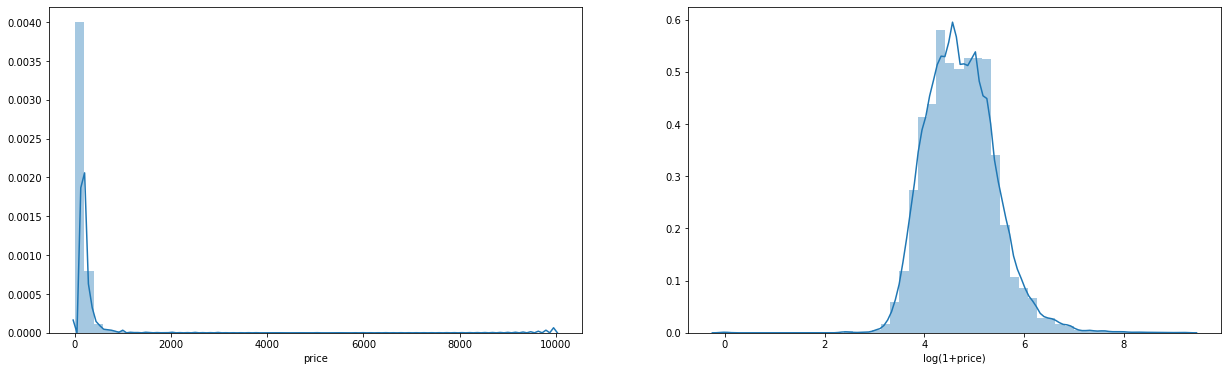

In [142]:
fig, axes = plt.subplots(1,2, figsize=(21,6))

sns.distplot(df_ml['price'], ax=axes[0])
sns.distplot(np.log1p(df_ml['price']), ax=axes[1])

axes[1].set_xlabel('log(1+price)')


Quindi effettuiamo la trasformazione sul prezzo

In [143]:
df_ml['price'] = np.log1p(df_ml['price'])

Questa analisi e questa trasformazione delle feature bisognerebbe farla per tutte le variabili che compaiono nel nostro dataset, alcune le abbiamo già analizzate durante la fase esplorativa

Analizziamo però anche il numero minimo di notti che compare come numero molto variabile, quindi per la stessa motivazione di prima è bene forse trasformarlo in scala logaritmica per avere dei dati continui più uniformi

Text(0, 0.5, 'count')

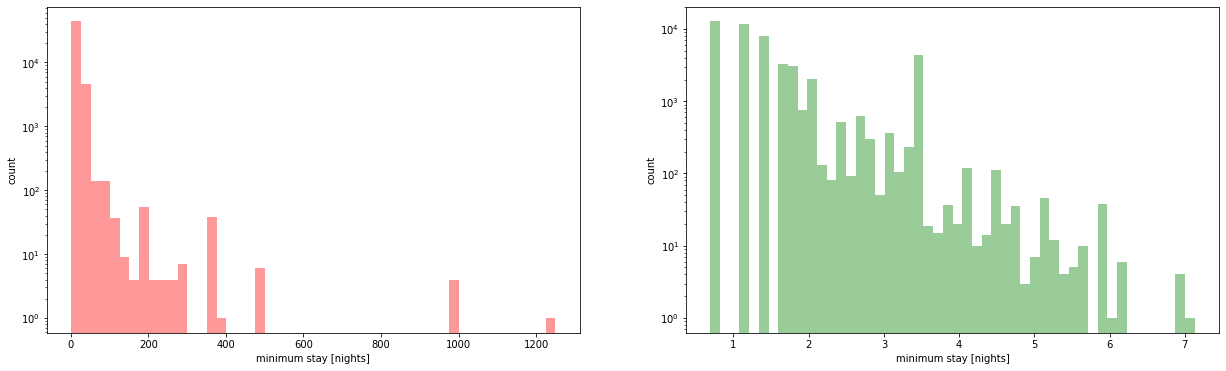

In [152]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))

sns.distplot(df_ml['minimum_nights'], rug=False, kde=False, color="red", ax = axes[0])
axes[0].set_yscale('log')
axes[0].set_xlabel('minimum stay [nights]')
axes[0].set_ylabel('count')

sns.distplot(np.log1p(df_ml['minimum_nights']), rug=False, kde=False, color="green", ax = axes[1])
axes[1].set_yscale('log')
axes[1].set_xlabel('minimum stay [nights]')
axes[1].set_ylabel('count')

In [153]:
df_ml['minimum_nights'] = np.log1p(df_ml['minimum_nights'])

Bisogna considerare ancora due variabili molto importanti molto aggregate tra di loro a livello di informazione:
- reviews_per_month
- availability_365

Conviene trattarle entrambe, iniziando a capire se si possono quanto meno suddividere in trend più piccoli (non è obbligatorio, ma consigliato quando si hanno dati aggregati e si conosce il dominio di quel dato)

(0, 365)

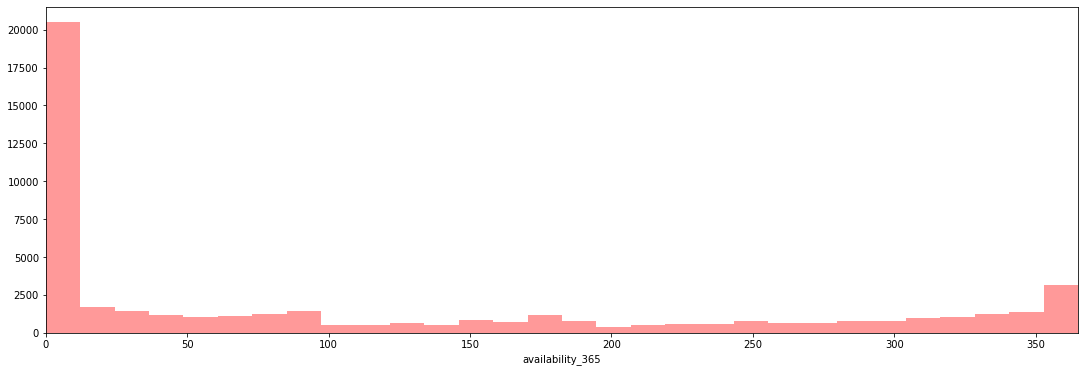

In [168]:
fig, axes = plt.subplots(1,1,figsize=(18.5, 6))
sns.distplot(df_ml['availability_365'], rug=False, kde=False, color="red", ax=axes)
axes.set_xlabel('availability_365')
axes.set_xlim(0, 365)

possiamo quindi dedurre che ci sono 3 periodi di disponibilità diversi su un dato aggregato temporale come availability_365, quindi conviene trasformare le feature in 3 variabili distinte:
- se un appartamento è disponibile 365 giorni all'anno
- se un appartamento è disponibile solo in alcuni momenti durante i vari mesi 

In [169]:
df_ml['all_year_avail'] = df_ml['availability_365']>353
df_ml['low_avail'] = df_ml['availability_365']< 12

#also create no reviews variable and not consider when we have lots of reviews
df_ml['reviews_per_month'] = df_ml[df_ml['reviews_per_month'] < 17.5]['reviews_per_month']
df_ml['no_reviews'] = df_ml['reviews_per_month']==0

### Correlazione

È importante adesso effettuare un'analisi sulla correlazione tra le variabili per capire le dipendenze tra di esse ed eventualmente affinare la parte di feature selection

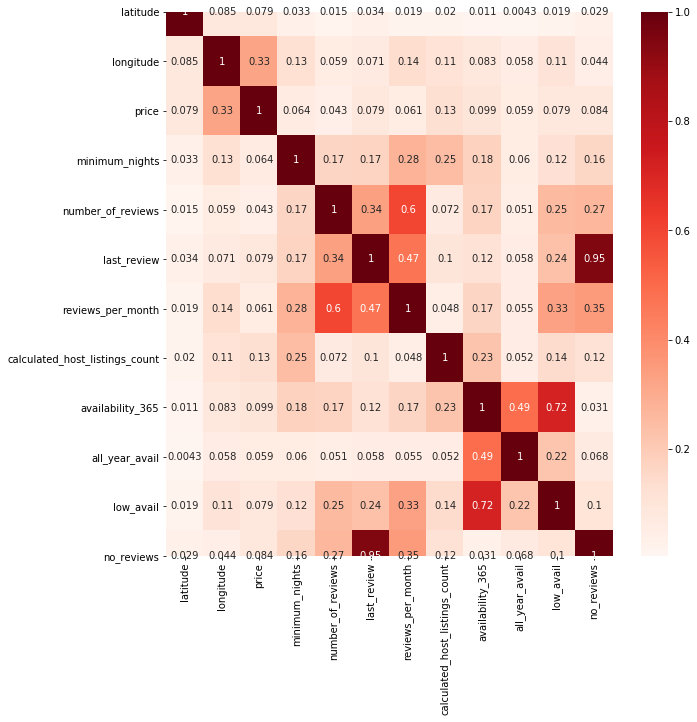

In [170]:
#Using Pearson Correlation
plt.figure(figsize=(10,10))
cor = abs(df_ml.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Come si può vedere dalla mappa ci sono delle correlazione più forti sulle reviews.

Il numero delle reviews al mese è abbastanza correlato con il numero di reviews totali che a suo volta è ben correlato con la disponibilità della proprietà, ed entrambe queste correlazioni hanno senso in realtà.

Si possono ricavare molte informazioni interessanti legate alla variabile target che vogliamo predirre, come il fatto che la longitudine e la latitudine sono anticorrelate sempre rispetto al prezzo. Questo soprattutto dovuto al fatto che le case nel Bronx e nel Queens sono più economiche rispetto a Manhattan e Brooklyn ad esempio!

È importante sottolineare come questo processo di correlazione sia fondamentale da svolgere con esperti di dominio e dei dati che ci aiutino ad interpretarne i risultati!

Nonostante alcuni valori di correlazione molto alta, iniziamo a considerare tutte le variabili...in caso di overfitting andremo a rimuovere quelle più correlate lavorando e sistemando la parte di Feature Engineering appena svolta

### Generiamo il dataset per il modello

Come prima cosa è importante SEMPRE trattare le feature categoriche che possono sicuramente dare problemi in alcuni tipi di modello che non le trattano e non le considerano automaticamente.  
Per fare ciò è necessario considerarle come variabili dummy

In [172]:
#Identify categorical features
categorical_features = df_ml.select_dtypes(include=['object'])
print('Categorical features: {}'.format(categorical_features.shape))

Categorical features: (48895, 3)


In [173]:
categorical_features_one_hot = pd.get_dummies(categorical_features)
categorical_features_one_hot.head()

neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                          0                             1   
1                          0                             0   
2                          0                             0   
3                          0                             1   
4                          0                             0   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                              0                           0   
1                              1                           0   
2                              1                           0   
3                              0                           0   
4                              1                           0   

   neighbourhood_group_Staten Island  neighbourhood_Allerton  \
0                                  0                       0   
1                                  0                       0   
2                                  0                       0   
3                                  0                       0   
4                                  0                       0   

   neighbourhood_Arden Heights  neighbourhood_Arrochar  neighbourhood_Arverne  \
0                            0                       0                      0   
1                            0                       0                      0   
2                            0                       0                      0   
3                            0                       0                      0   
4                            0                       0                      0   

   neighbourhood_Astoria  ...  neighbourhood_Williamsburg  \
0                      0  ...                           0   
1                      0  ...                           0   
2                      0  ...                           0   
3                      0  ...                           0   
4                      0  ...                           0   

   neighbourhood_Willowbrook  neighbourhood_Windsor Terrace  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   neighbourhood_Woodhaven  neighbourhood_Woodlawn  neighbourhood_Woodrow  \
0                        0                       0                      0   
1                        0                       0                      0   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       0                      0   

   neighbourhood_Woodside  room_type_Entire home/apt  room_type_Private room  \
0                       0                          0                       1   
1                       0                          1                       0   
2                       0                          0                       1   
3                       0                          1                       0   
4                       0                          1                       0   

   room_type_Shared room  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 229 columns]

In [175]:
#Take only the numerical (we add the categorical later)
df_temp = df_ml.copy()
df_temp =  df_ml.select_dtypes(exclude=['object'])

#get the label
y = df_temp.price

#Remove from numerical features the label y
df_temp = df_temp.drop(['price'], axis=1)

print('Numerical features: {}'.format(df_temp.shape))
y.head()

Numerical features: (48895, 11)


0    5.010635
1    5.420535
2    5.017280
3    4.499810
4    4.394449
Name: price, dtype: float64

In [180]:
#add the categorical to numeric one
X = np.concatenate((df_temp, categorical_features_one_hot), axis=1)
X_df = pd.concat([df_temp, categorical_features_one_hot], axis=1)

#X = numpy array, can be useful for some models
#X_df = is the pandas dataframe representation

In [182]:
#Final check the shape and the data
print(f'X shape:{X.shape}')
print(f'X shape:{X_df.shape}')
print(f'y shape:{y.shape}')

X_df

X shape:(48895, 240)
X shape:(48895, 240)
y shape:(48895,)


latitude  longitude  minimum_nights  number_of_reviews  last_review  \
0      40.64749  -73.97237        0.693147                  9         2762   
1      40.75362  -73.98377        0.693147                 45         2976   
2      40.80902  -73.94190        1.386294                  0            0   
3      40.68514  -73.95976        0.693147                270         3021   
4      40.79851  -73.94399        2.397895                  9         2793   
...         ...        ...             ...                ...          ...   
48890  40.67853  -73.94995        1.098612                  0            0   
48891  40.70184  -73.93317        1.609438                  0            0   
48892  40.81475  -73.94867        2.397895                  0            0   
48893  40.75751  -73.99112        0.693147                  0            0   
48894  40.76404  -73.98933        2.079442                  0            0   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.21                               6               365   
1                   0.38                               2               355   
2                   0.00                               1               365   
3                   4.64                               1               194   
4                   0.10                               1                 0   
...                  ...                             ...               ...   
48890               0.00                               2                 9   
48891               0.00                               2                36   
48892               0.00                               1                27   
48893               0.00                               6                 2   
48894               0.00                               1                23   

       all_year_avail  low_avail  ...  neighbourhood_Williamsburg  \
0                True      False  ...                           0   
1                True      False  ...                           0   
2                True      False  ...                           0   
3               False      False  ...                           0   
4               False       True  ...                           0   
...               ...        ...  ...                         ...   
48890           False       True  ...                           0   
48891           False      False  ...                           0   
48892           False      False  ...                           0   
48893           False       True  ...                           0   
48894           False      False  ...                           0   

       neighbourhood_Willowbrook  neighbourhood_Windsor Terrace  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   
...                          ...                            ...   
48890                          0                              0   
48891                          0                              0   
48892                          0                              0   
48893                          0                              0   
48894                          0                              0   

       neighbourhood_Woodhaven  neighbourhood_Woodlawn  neighbourhood_Woodrow  \
0                            0                       0                      0   
1                            0                       0                      0   
2                            0                       0                      0   
3                            0                       0                      0   
4                            0                       0                      0   
...          

Pronti per un Hunga Bunga???  
https://github.com/ypeleg/HungaBunga

In [184]:
from hunga_bunga import HungaBungaRegressor
clf = HungaBungaRegressor()
clf.fit(X, y)

ModuleNotFoundError: No module named 'regression'

Ok non funziona e non ho tempo di fixarlo adesso :P Però ci lavoro e faccio qualche pull request sulla repo ufficiale...sperando vada su pip quanto prima...
Se volete provare la versione aggiornata dovete scaricare gli script e i pacchetti da github e usarlo direttamente...